# Q3

In [1]:
from PIL import Image
from skimage import color
from matplotlib import pyplot as plt
from scipy.spatial.distance import hamming
import numpy as np
import random
import copy
import math

Image Size: (454, 454)


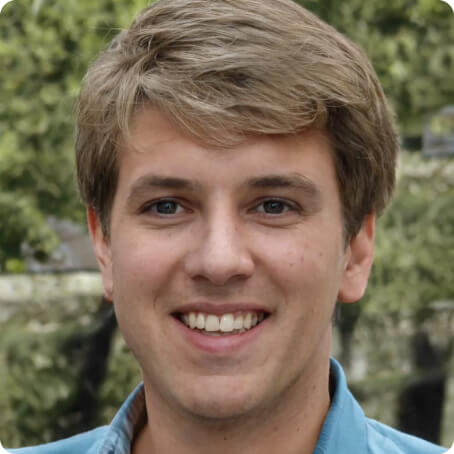

In [2]:
im = Image.open('Images_Q3/train.jpg', 'r')
print('Image Size:', im.size)
im

# Part 2
## Preprocessing

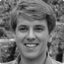

In [3]:
# Resizing
im = im.resize((64, 64))

#rgb to grayscale
img = im.convert('L')
img

In [4]:
#getting data from image and converting to Bipolar
def convert_to_bipolar(img_):
    threshold = 120
    pix_val = list(img_.getdata())
    img_vector = copy.deepcopy(pix_val)
    for i in range(len(img_vector)):
        if img_vector[i] >= threshold:
            img_vector[i] = 1
        else:
            img_vector[i] = -1
    return img_vector

img_vector = convert_to_bipolar(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


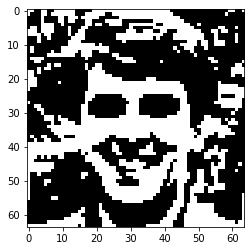

In [5]:
def num_to_rgb(vector_):
    vector = copy.deepcopy(vector_)
    result = np.zeros(shape=(len(vector),3))
    for i in range(len(vector)):
        if vector[i] == 1:
            result[i] = (255,255,255)
        elif vector[i] == -1:
            result[i] = (0,0,0)
    return result

def show_image(vector_):
    vector = num_to_rgb(vector_)
    result = np.zeros(shape=(64,64,3))
    for i in range(64):
        for j in range(64):
            result[i][j] = vector[i*64+j]
    plt.figure()
    plt.imshow([list(i) for i in result])
    
show_image(img_vector)

# Part 3
### Creating Weight Matrix

In [6]:
weight_matrix = np.zeros((len(img_vector),len(img_vector)))
def update_weight(img_vector_):
    for i in range(len(img_vector_)):
        for j in range(len(img_vector_)):
            weight_matrix[i][j] += img_vector_[i]*img_vector_[j]
        
update_weight(img_vector)
P = 1
weight_matrix_modified = weight_matrix - P*np.eye(len(img_vector), dtype=int)
weight_matrix_modified.shape

(4096, 4096)

# Part 4

### Reading and Displaying test Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


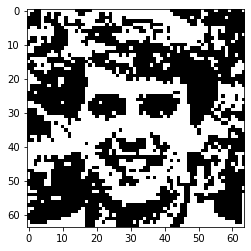

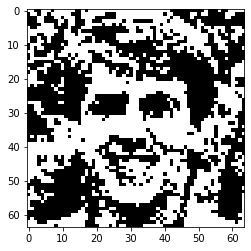

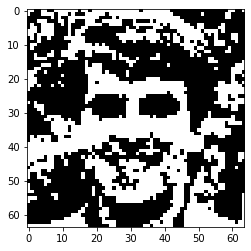

In [22]:
im_test_1 = Image.open('Images_Q3/test1.png', 'r')
im_test_1 = im_test_1.resize((64, 64))
im_test_1 = im_test_1.convert('L')
img_vector_test_1 = convert_to_bipolar(im_test_1)
show_image(img_vector_test_1)

im_test_2 = Image.open('Images_Q3/test2.png', 'r')
im_test_2 = im_test_2.resize((64, 64))
im_test_2 = im_test_2.convert('L')
img_vector_test_2 = convert_to_bipolar(im_test_2)
show_image(img_vector_test_2)

im_test_3 = Image.open('Images_Q3/test3.png', 'r')
im_test_3 = im_test_3.resize((64, 64))
im_test_3 = im_test_3.convert('L')
img_vector_test_3 = convert_to_bipolar(im_test_3)
show_image(img_vector_test_3)

### Discrete Hopfield Net

In [23]:
def hopfield_net(img_vector_test_):
    hamming_distance_list = []
    x_test = copy.deepcopy(img_vector_test_)
    #step 2
    y = x_test
    random_order = random.sample(range(0,len(x_test)), len(x_test))
    im_pos = 0
    theta = 0.5
    plt.figure(figsize=(64, 64))

    for iteration in range(10*8*50):
        #step 3
        for i in range(len(random_order)):
            hamming_distance_list.append(hamming(img_vector, y) * len(img_vector_test_))
            #step 4
            y[random_order[i]] = x_test[random_order[i]] + np.matmul(y, np.array([weight_matrix_modified[:, random_order[i]]]).T)

            #step 5
            if y[random_order[i]] > theta:
                y[random_order[i]] = 1
    #         elif y[random_order[i]] == theta:
    #             y[random_order[i]] = y[random_order[j]]
            elif y[random_order[i]] < theta:
                y[random_order[i]] = -1

            iteration += 1

            #displaying reault every each 50 iterations
            if iteration % 50 == 0:
                im_pos += 1
                if im_pos == 10*8 + 1:
                    return y, hamming_distance_list
                plt.subplot(10, 8, im_pos)
                plt.imshow(np.array(y).reshape(64,64), cmap='gray')
                plt.title(iteration, fontsize = 40)

### Test Image 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


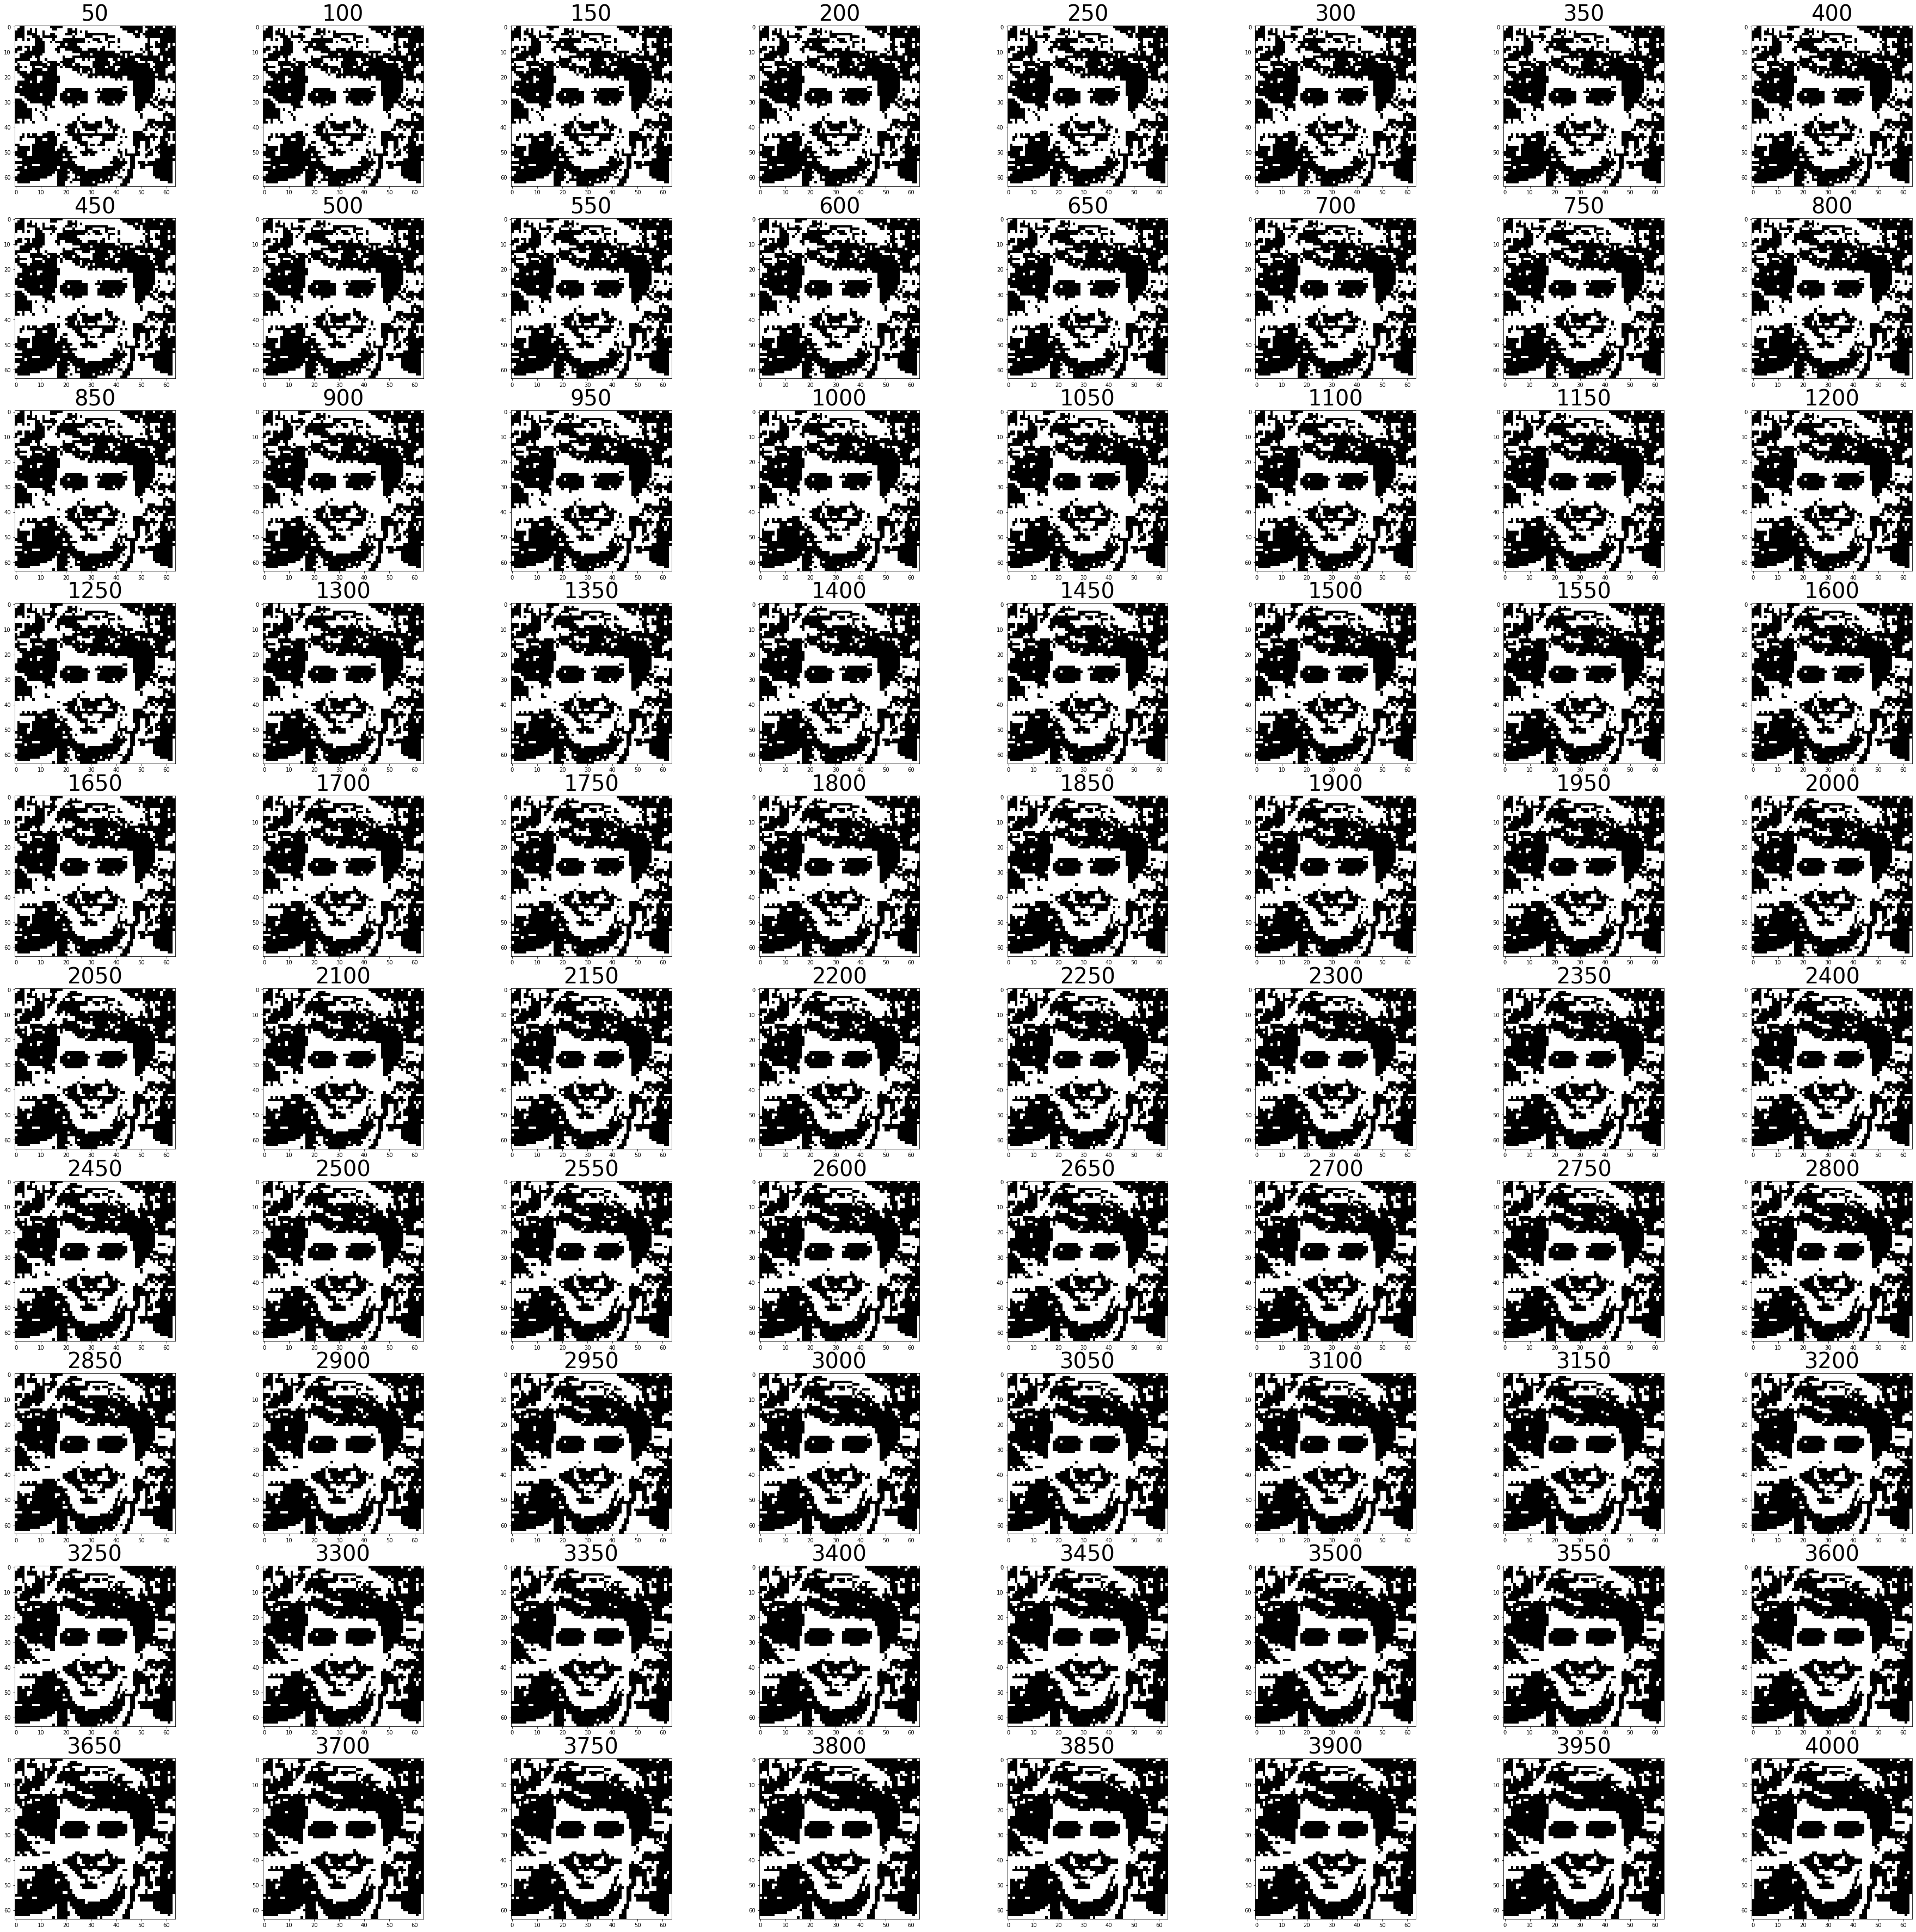

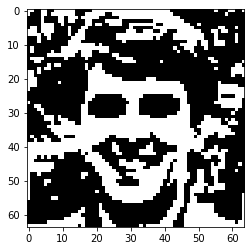

In [24]:
y, hamming_distance_list_1 = hopfield_net(img_vector_test_1)
show_image(y)

### Test Image 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


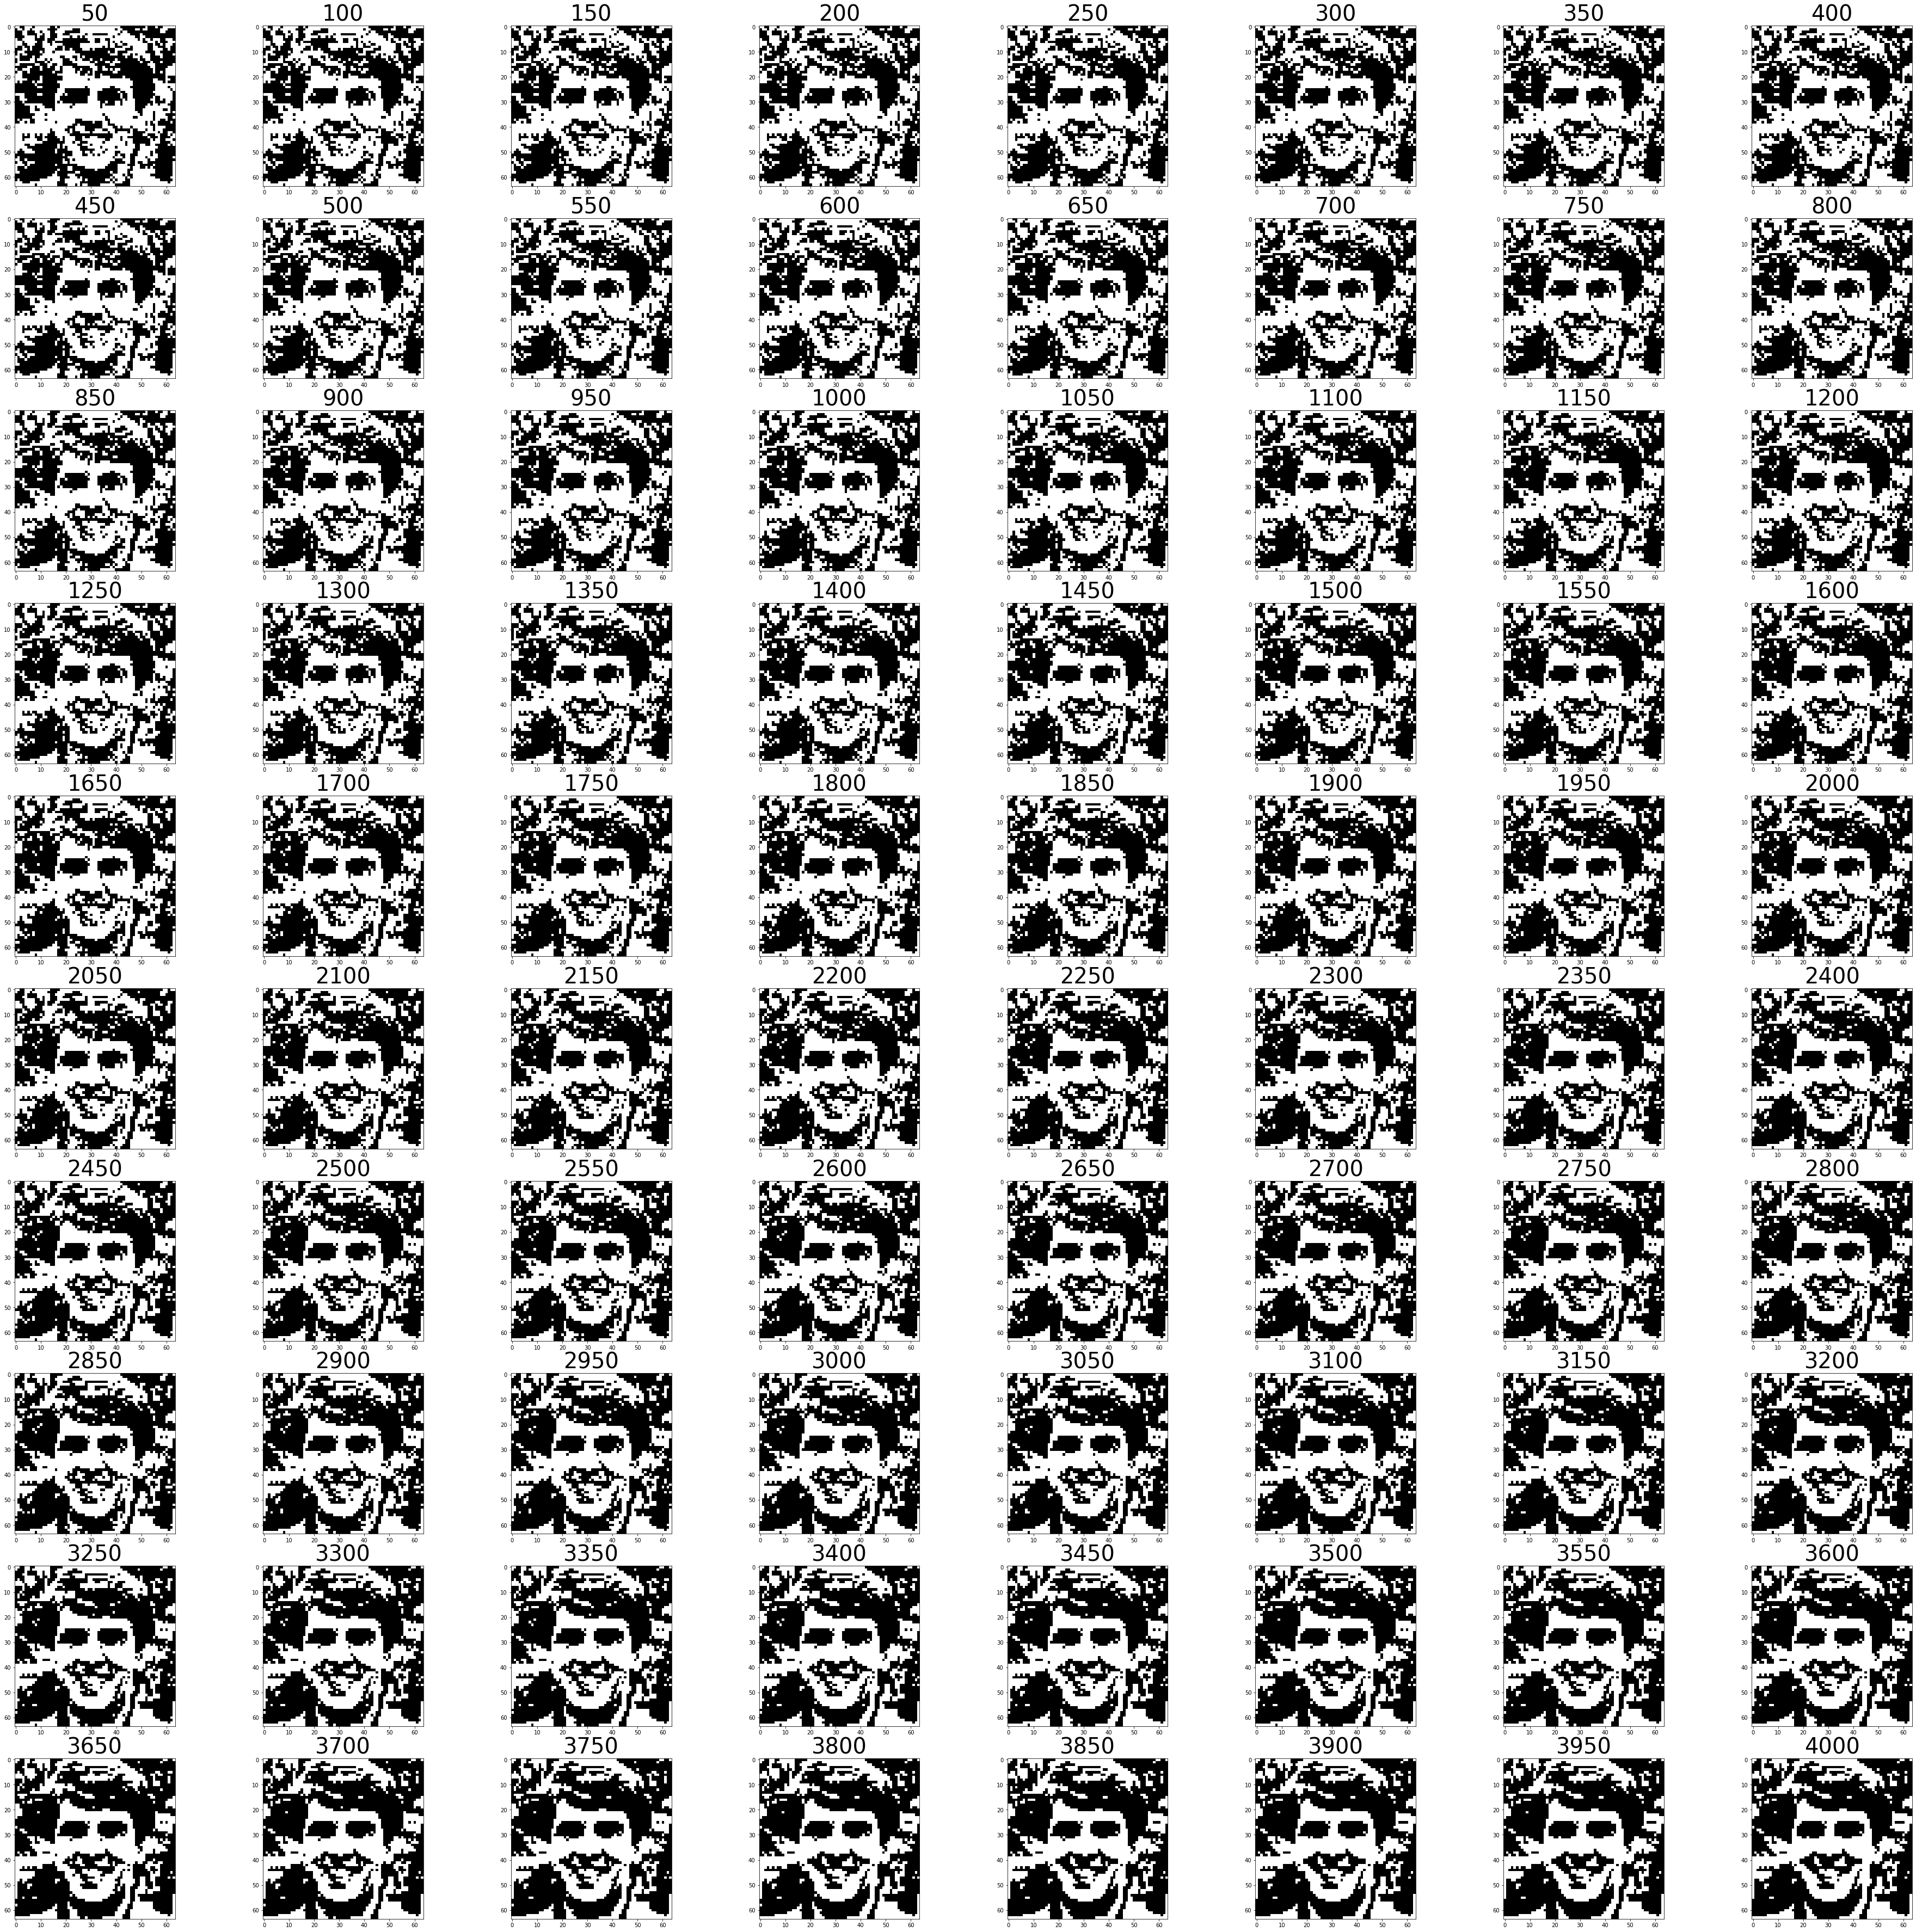

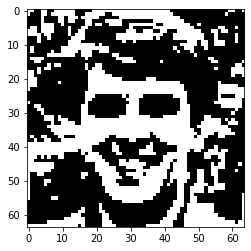

In [25]:
y, hamming_distance_list_2 = hopfield_net(img_vector_test_2)
show_image(y)

### Test Image 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


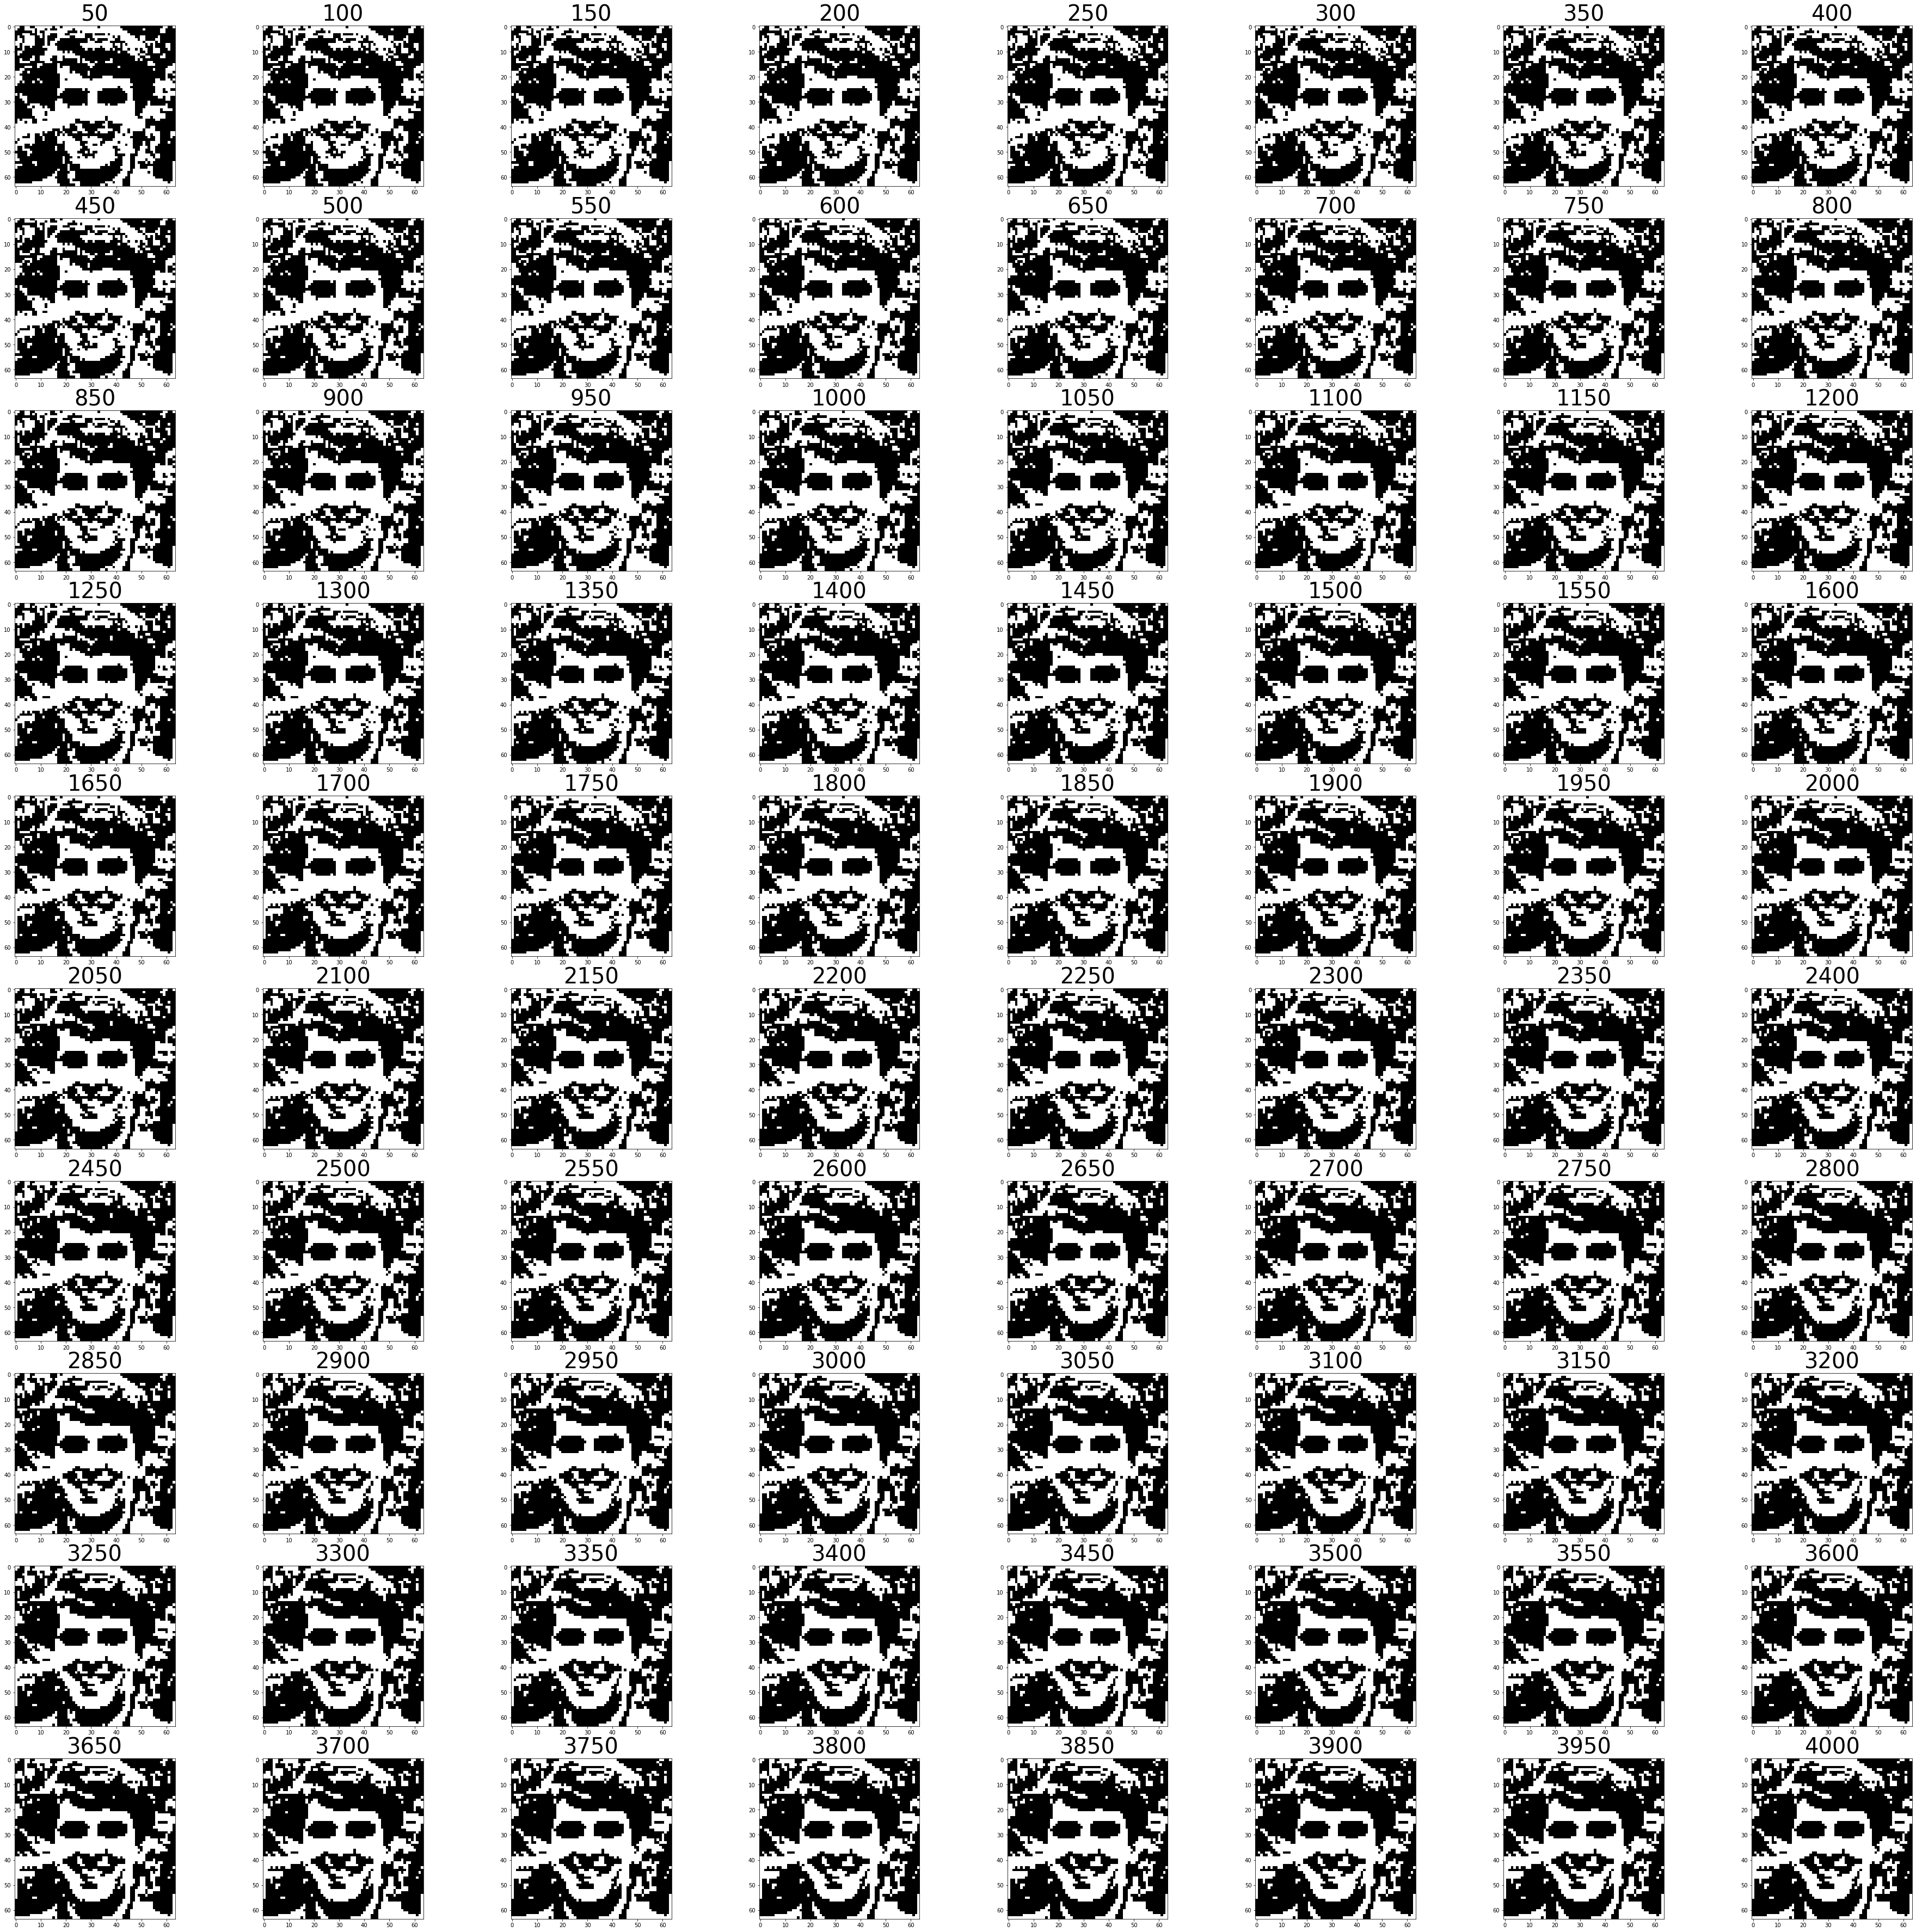

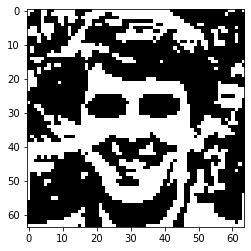

In [26]:
y, hamming_distance_list_3 = hopfield_net(img_vector_test_3)
show_image(y)

# Part 5
### Plotting hamming distance per iterations for each test Image

### Test Image 1

Text(0.5, 1.0, 'Test Image 1')

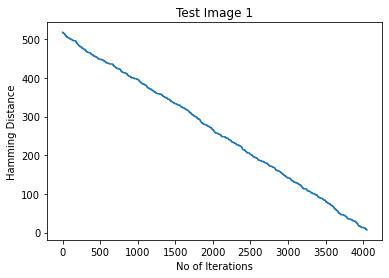

In [33]:
plt.plot(hamming_distance_list_1)
plt.xlabel("No of Iterations")
plt.ylabel("Hamming Distance")
plt.title('Test Image 1')

### Test Image 2

Text(0.5, 1.0, 'Test Image 2')

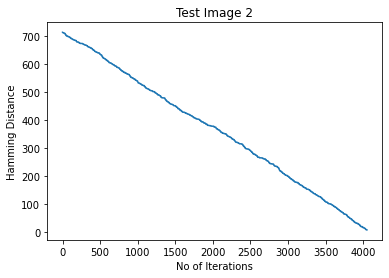

In [34]:
plt.plot(hamming_distance_list_2)
plt.xlabel("No of Iterations")
plt.ylabel("Hamming Distance")
plt.title('Test Image 2')

### Test Image 3

Text(0.5, 1.0, 'Test Image 3')

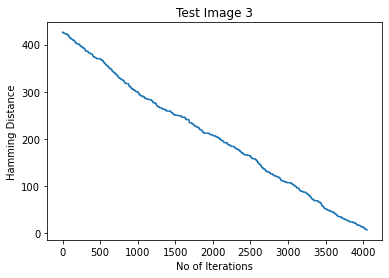

In [35]:
plt.plot(hamming_distance_list_3)
plt.xlabel("No of Iterations")
plt.ylabel("Hamming Distance")
plt.title('Test Image 3')